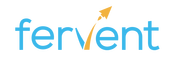
# Expected Returns using Asset Pricing Models I - Applied
In this walkthrough, you'll learn how to estimate the Expected Return on the Market.  

Please note that we've intentionally ignored estimating the Beta for now.  

The estimation of Beta is covered extensively in a later lecture.

In [1]:
import pandas as pd

<div class="alert alert-block alert-info">
<b>Confused by the code below?</b>  

If you don't quite 'get' the code in `In[2]`, please go back to the lecture on 'Estimating Expected Returns using Average (Mean) Method II - Creating a Function', before moving on any further.
</div>


In [2]:
def getExpectedReturn(df, price_col_name, annualised=True, annualise_method='sophisticated'):
    """
    Returns the expected return of a security given price data.
    """

    # Calculate returns of prices
    returns = df[price_col_name].pct_change(1)
    
    # Calculate the expected return using the mean method
    expected_return_daily = returns.mean()
    
    if annualised:
        if annualise_method == 'sophisticated':
            expected_return_annual = ((1 + expected_return_daily) ** 250) - 1
        elif annualise_method == 'crude':
            # Crude method
            expected_return_annual = expected_return_daily * 250

        return expected_return_annual
    
    else:
        return expected_return_daily

In [3]:
sp500 = pd.read_csv("../data/sp500_price.csv")

In [4]:
sp500.head()

,Date,sp500
0,01/03/2012 16:00,1277.06
1,01/04/2012 16:00,1277.30
2,01/05/2012 16:00,1281.06
3,01/06/2012 16:00,1277.81
4,01/09/2012 16:00,1280.70


In [5]:
# Annualised Expected Return of the Market (E[r_m]) - sophisticated method
getExpectedReturn(df=sp500, price_col_name='sp500')  # remember that the default value for 'annualised' is True

0.13854129369128

In [6]:
# Annualised Expected Return of the Market (E[r_m]) - crude method
getExpectedReturn(df=sp500, price_col_name='sp500', annualise_method='crude')

0.1297815509722894

### Bonus: Estimating the Expected Return using the CAPM (via Function)
We could of course create a function to calculate the Expected Return of a stock by using the CAPM

In [7]:
def CAPM_expected_return(r_f, expected_return_market, beta_j):
    """
    Returns the Expected Return of a security using the CAPM formula.
    Can use the function getExpectedReturn() to set the expected_return_market parameter.
    """
    expected_return_capm = r_f + beta_j * (expected_return_market - r_f)

    return expected_return_capm

<div class="alert alert-block alert-info">
<b>Did You Know?</b>  

Python doesn't really need explicit spaces when writing out computations. For example, in the function above, we wrote:  
`expected_return_capm = r_f + beta_j * (expected_return_market - r_f)`  
<br>
We could ignore white spaces and write it as:  
`expected_return_capm=r_f+beta_j*(expected_return_market-r_f)`  
<br>
The code will still work, but it's just so much harder for us humans to read!  
<br>
While we generally like to use white space to increase ease of readability, in some cases, we intentionally ignore white spaces. For example, it's common convention to ignore white spaces when assigning parameters within functions.  
<br>
That is why in the code below, you see things like `r_f=0.0309` instead of `r_f = 0.0309`

</div>


In [8]:
# Use the getExpectedReturn() function inside the CAPM_expected_return() function
CAPM_expected_return(
    r_f=0.0309,  # being the 10 year yield on US Treasuries, obtained from the FT at the time of recording.
    expected_return_market=getExpectedReturn(df=sp500, price_col_name='sp500'),
    beta_j=1.1233)  # being the Beta of Alphabet Inc (GOOGL) obtained from the FT at the time of recording.

# Note that this gives us the same E[r_GOOGL] = 15.18% estimated manually in the lecture.

0.15181346520341482